# 딥러닝을 이용한 시계열 예측

시계열 데이터 종류 : 주가 등등  
시간 간격은 초, 분, 시간, 일, 월 년으로 다양함  
자기상관 개념이 들어가 있음 (자신의 과거 데이터를 가지고 미래 시점을 예측하고 싶은 것)  

전통적인 시계열 분석에서 많이 사용하는 것은 지수 평활법, 이동 평균법  
ARIMA 모델 같은 것들이 있음  
이러한 것들은 모두 전통적인 통계적 방법임.  

최근에는 딥러닝을 이용해서 시계열 예측을 해나가고 있다.

1. 인공신경망을 이용한 시계열 예측  
2. CNN을 이용한 시계열 예측
3. RNN을 이용한 시계열 예측

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
df = pd.read_csv('C:\study\workspace_python\pdsample\datasets\mydata\PRSA_data_2010.1.1-2014.12.31.csv')

In [3]:
#press 를 예측하려고 한다.
print('Shape of the data', df.shape)
df.head()

Shape of the data (43824, 13)


,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [5]:
#전처리 작업하기
df['datetime'] = df[['year','month','day','hour']].apply(lambda row : datetime.datetime(year=row['year'],month=row['month'],day=row['day'],hour=row['hour']),axis=1)

In [6]:
df.sort_values('datetime', ascending=True, inplace = True)

C:\ca_da\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


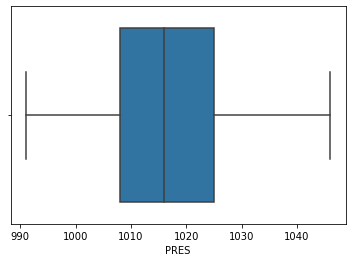

In [7]:
g = sns.boxplot(df['PRES'])

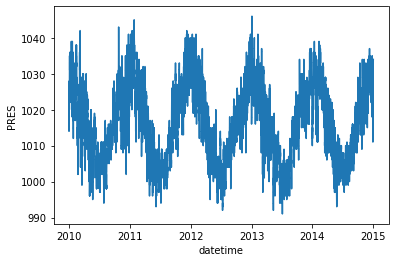

In [8]:
g = sns.lineplot(x = 'datetime',y = 'PRES', data = df)

In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))
df['scaled_PRES'] = scaler.fit_transform(np.array(df['PRES']).reshape(-1,1))

In [10]:
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,datetime,scaled_PRES
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0,2010-01-01 00:00:00,0.545455
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0,2010-01-01 01:00:00,0.527273
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0,2010-01-01 02:00:00,0.509091
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0,2010-01-01 03:00:00,0.509091
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0,2010-01-01 04:00:00,0.490909


In [11]:
#훈련 데이터 테스트 데이터 나누기

#시계열 데이터는 랜덤하게 train, test split 을 하지 않고 기간을 기준으로 나눠서 진행한다.

#데이터가 적은 경우에는 놀린개념사용

split_date = datetime.datetime(year = 2014, month = 1, day = 1, hour = 0)

df_train =  df.loc[df['datetime']<split_date]
df_test = df.loc[df['datetime']>split_date]


print('Shape of train', df_train.shape)
print('Shape of test', df_test.shape)

Shape of train (35064, 15)
Shape of test (8759, 15)


In [12]:
df_test.reset_index(drop=True, inplace = True)

<AxesSubplot:xlabel='datetime', ylabel='scaled_PRES'>

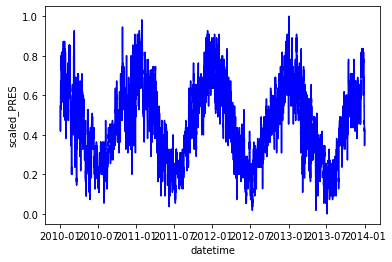

In [13]:
sns.lineplot(x='datetime',y='scaled_PRES', data = df_train, color  ='b')

In [14]:
df_test

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,datetime,scaled_PRES
0,35066,2014,1,1,1,53.0,-20,7.0,1013.0,NW,147.50,0,0,2014-01-01 01:00:00,0.400000
1,35067,2014,1,1,2,65.0,-20,6.0,1013.0,NW,151.52,0,0,2014-01-01 02:00:00,0.400000
2,35068,2014,1,1,3,70.0,-20,6.0,1013.0,NW,153.31,0,0,2014-01-01 03:00:00,0.400000
3,35069,2014,1,1,4,79.0,-18,3.0,1012.0,cv,0.89,0,0,2014-01-01 04:00:00,0.381818
4,35070,2014,1,1,5,92.0,-18,4.0,1012.0,NW,4.02,0,0,2014-01-01 05:00:00,0.381818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8754,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0,2014-12-31 19:00:00,0.781818
8755,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0,2014-12-31 20:00:00,0.781818
8756,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0,2014-12-31 21:00:00,0.781818
8757,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0,2014-12-31 22:00:00,0.781818


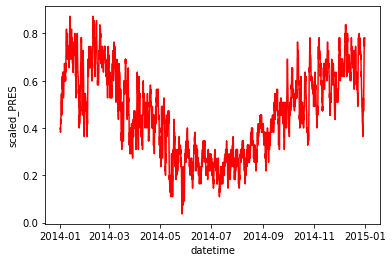

In [15]:
g = sns.lineplot(x = 'datetime', y='scaled_PRES', data = df_test, color = 'r')

makeXy 함수

t시점의 x값을 예측하고 싶다.(Xt)
Xt-1, Xt-2 .... Xt-n으로 예측

Xt 가 목표변수가 되는 것이고 나머지 Xt-1 ....Xt-n 이 입력변수가 되는 것임

차분에 관한 시계열로 변환시킬 수 있다.  
예를 들어서 Xt - Xt-1 = Yt 로 하여 기존의 시계열 데이터를 이용해 새로운 시계열 데이터를 만들 수 있다.
Xt - Xt-1 이 차분.

In [18]:
def makeXy(ts, nb_timesteps): #종속변수 앞의 몇 개의 입력변수를 가져올지 결정)
    X = [] #시계열 입력변수들
    y = [] #시계열 종속변수 t시점의 x값
    for i in range(nb_timesteps, ts.shape[0]):
                  X.append(list(ts.loc[i-nb_timesteps:i-1]))
                  y.append(ts.loc[i])
    X,y = np.array(X),np.array(y)
    return X,y

In [19]:
X_train, y_train = makeXy(df_train['scaled_PRES'],7)
print('Shape of train arrays :', X_train.shape, y_train.shape)
print(X_train[0])
print(y_train[0])

Shape of train arrays : (35057, 7) (35057,)
[0.54545455 0.52727273 0.50909091 0.50909091 0.49090909 0.47272727
 0.47272727]
0.47272727272727266


In [20]:
X_test, y_test = makeXy(df_test['scaled_PRES'],7)
print('Shape of test arrays:', X_test.shape, y_test.shape)
print(X_test[0])
print(y_test[0])


Shape of test arrays: (8752, 7) (8752,)
[0.4        0.4        0.4        0.38181818 0.38181818 0.38181818
 0.4       ]
0.40000000000000213


In [33]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [65]:
# from keras.layers import Dense, Dropout
# from keras.models import Sequential

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [31]:
model = Sequential()
model.add(Dense(32, activation='relu',input_shape  = (7,)))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dropout(0,2))
model.add(Dense(1, activation = 'linear'))

model.compile(loss = 'mean_squared_error', optimizer = 'adam')
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 32)                256       
_________________________________________________________________
dense_9 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_10 (Dense)             (None, 16)                272       
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 17        
Total params: 1,073
Trainable params: 1,073
Non-trainable params: 0
_________________________________________________________________


In [32]:
history = model.fit(X_train, y_train, batch_size = 16, epochs = 20,
                   verbose = 1, validation_split = 0.3, shuffle=True)

Epoch 1/20


TypeError: in user code:

    C:\ca_da\anaconda\lib\site-packages\keras\engine\training.py:853 train_function  *
        return step_function(self, iterator)
    C:\ca_da\anaconda\lib\site-packages\keras\engine\training.py:842 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\ca_da\anaconda\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\ca_da\anaconda\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\ca_da\anaconda\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\ca_da\anaconda\lib\site-packages\keras\engine\training.py:835 run_step  **
        outputs = model.train_step(data)
    C:\ca_da\anaconda\lib\site-packages\keras\engine\training.py:787 train_step
        y_pred = self(x, training=True)
    C:\ca_da\anaconda\lib\site-packages\keras\engine\base_layer.py:1037 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    C:\ca_da\anaconda\lib\site-packages\keras\engine\sequential.py:369 call
        return super(Sequential, self).call(inputs, training=training, mask=mask)
    C:\ca_da\anaconda\lib\site-packages\keras\engine\functional.py:414 call
        return self._run_internal_graph(
    C:\ca_da\anaconda\lib\site-packages\keras\engine\functional.py:550 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    C:\ca_da\anaconda\lib\site-packages\keras\engine\base_layer.py:1037 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    C:\ca_da\anaconda\lib\site-packages\keras\layers\core.py:212 call
        output = control_flow_util.smart_cond(training, dropped_inputs,
    C:\ca_da\anaconda\lib\site-packages\keras\utils\control_flow_util.py:105 smart_cond
        return tf.__internal__.smart_cond.smart_cond(
    C:\ca_da\anaconda\lib\site-packages\tensorflow\python\framework\smart_cond.py:56 smart_cond
        return true_fn()
    C:\ca_da\anaconda\lib\site-packages\keras\layers\core.py:208 dropped_inputs
        noise_shape=self._get_noise_shape(inputs),
    C:\ca_da\anaconda\lib\site-packages\keras\layers\core.py:197 _get_noise_shape
        for i, value in enumerate(self.noise_shape):

    TypeError: 'int' object is not iterable


In [69]:
print(tf.__version__)

2.6.0


In [70]:
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D #이미지는 2D
from keras.layers.pooling import AveragePooling1D #MAX POOLING 말고 이거 
from keras.models import Sequential

In [ ]:
#입력 변수를 3d배열로
X_train, X_test = X_train.reshape((X_train.shape[0], X_train.shape[1],1)),
X_test.reshape

sd
fd
d

